# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#installing citipy
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=483996b5bc316de14ae56ca8872ecb87af1c68ab4ce300fcd127e18c4e24bfa2
  Stored in directory: c:\users\seraf\appdata\local\pip\cache\wheels\eb\07\14\1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\seraf\anaconda3\envs\PythonData\python.exe -m pip install --upgrade pip' command.


In [13]:
# imports and setups
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
from citipy import citipy

#output
output_data_file = "Output_Data/cities.csv"

#Ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)     
# Print the city count to confirm sufficient count
print(cities)
len(cities)

['blankenberge', 'rawson', 'yellowknife', 'hithadhoo', 'shingu', 'upernavik', 'namatanai', 'grand river south east', 'kuche', 'ushuaia', 'kapaa', 'bolungarvik', 'mataura', 'mehamn', 'longyearbyen', 'taoudenni', 'mar del plata', 'nanortalik', 'sochi', 'senno', 'aklavik', 'marsa matruh', 'avarua', 'nchelenge', 'hilo', 'hervey bay', 'limbang', 'mount gambier', 'broome', 'port elizabeth', 'ribeira grande', 'ilulissat', 'cape town', 'atbasar', 'rikitea', 'jamestown', 'maltahohe', 'hobart', 'egvekinot', 'puerto ayora', 'khatanga', 'dien bien', 'baykit', 'chingirlau', 'kontagora', 'taolanaro', 'saint-imier', 'butaritari', 'yeppoon', 'albany', 'nizhneyansk', 'bambous virieux', 'keti bandar', 'crotone', 'beringovskiy', 'pisco', 'atuona', 'hofn', 'nouadhibou', 'castro', 'itoman', 'muriwai beach', 'bredasdorp', 'belushya guba', 'saskylakh', 'tuktoyaktuk', 'port alfred', 'lebu', 'fountain', 'ukiah', 'vaini', 'ponta delgada', 'coihaique', 'bosaso', 'sitka', 'buala', 'sabha', 'acarau', 'pacifica', '

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# save url information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [16]:
# create list to hold data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [17]:
#Print
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : blankenberge
Processing Record 2 of Set 1 : rawson
Processing Record 3 of Set 1 : yellowknife
Processing Record 4 of Set 1 : hithadhoo
Processing Record 5 of Set 1 : shingu
Processing Record 6 of Set 1 : upernavik
Processing Record 7 of Set 1 : namatanai
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : kapaa
City not found. Skipping...
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : mehamn
Processing Record 12 of Set 1 : longyearbyen
Processing Record 13 of Set 1 : taoudenni
Processing Record 14 of Set 1 : mar del plata
Processing Record 15 of Set 1 : nanortalik
Processing Record 16 of Set 1 : sochi
Processing Record 17 of Set 1 : senno
Processing Record 18 of Set 1 : aklavik
Processing Record 19 of Set 1 : marsa matruh
Processing Record 20 of Set 1 : avarua
Processing Record 21 of Set 1 : nchelenge
P

Processing Record 35 of Set 4 : klyuchi
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4 : bergheim
City not found. Skipping...
Processing Record 37 of Set 4 : thompson
Processing Record 38 of Set 4 : arauco
City not found. Skipping...
Processing Record 39 of Set 4 : arrifes
Processing Record 40 of Set 4 : bull savanna
Processing Record 41 of Set 4 : garowe
Processing Record 42 of Set 4 : cidreira
Processing Record 43 of Set 4 : avera
Processing Record 44 of Set 4 : tasiilaq
Processing Record 45 of Set 4 : lompoc
Processing Record 46 of Set 4 : barrow
Processing Record 47 of Set 4 : faya
Processing Record 48 of Set 4 : alihe
Processing Record 49 of Set 4 : richards bay
Processing Record 50 of Set 4 : chokurdakh
Processing Record 0 of Set 5 : nikolskoye
Processing Record 1 of Set 5 : visnes
Processing Record 2 of Set 5 : plettenberg bay
Processing Record 3 of Set 5 : ulladulla
Processing Record 4 of Set 5 : lakes entrance
Processing Record 5 of Set 5

Processing Record 18 of Set 8 : pevek
Processing Record 19 of Set 8 : ust-tsilma
Processing Record 20 of Set 8 : olafsvik
Processing Record 21 of Set 8 : fukue
Processing Record 22 of Set 8 : vestmannaeyjar
Processing Record 23 of Set 8 : aswan
Processing Record 24 of Set 8 : port hedland
Processing Record 25 of Set 8 : nabire
Processing Record 26 of Set 8 : macau
Processing Record 27 of Set 8 : mingaora
Processing Record 28 of Set 8 : dzaoudzi
Processing Record 29 of Set 8 : abu dhabi
Processing Record 30 of Set 8 : verkhnyaya inta
Processing Record 31 of Set 8 : quatre cocos
Processing Record 32 of Set 8 : hualmay
Processing Record 33 of Set 8 : batsfjord
Processing Record 34 of Set 8 : ishigaki
Processing Record 35 of Set 8 : zvishavane
Processing Record 36 of Set 8 : casablanca
Processing Record 37 of Set 8 : alice springs
Processing Record 38 of Set 8 : bandarbeyla
Processing Record 39 of Set 8 : bolshoye nagatkino
Processing Record 40 of Set 8 : gasa
Processing Record 41 of Set 8

Processing Record 6 of Set 12 : comarapa
Processing Record 7 of Set 12 : hwange
Processing Record 8 of Set 12 : awbari
Processing Record 9 of Set 12 : sao joao da barra
Processing Record 10 of Set 12 : rawatbhata
Processing Record 11 of Set 12 : oistins
Processing Record 12 of Set 12 : coos bay
Processing Record 13 of Set 12 : sinnamary
Processing Record 14 of Set 12 : barra do garcas
Processing Record 15 of Set 12 : kenai
Processing Record 16 of Set 12 : san julian
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#DataFrame
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [39]:
#count
weather_dict.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [40]:
#df print
weather_dict


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Blankenberge,16,BE,1603330338,81,51.31,3.13,57.00,3.00
1,Rawson,31,AR,1603330248,38,-43.30,-65.10,56.95,20.40
2,Yellowknife,75,CA,1603330290,79,62.46,-114.35,24.80,16.11
3,Hithadhoo,12,MV,1603330338,74,-0.60,73.08,82.60,12.88
4,Shingū,75,JP,1603330339,69,33.73,135.98,73.40,11.41
...,...,...,...,...,...,...,...,...,...
572,Coos Bay,1,US,1603330459,71,43.37,-124.22,55.99,17.22
573,Sinnamary,0,GF,1603330460,83,5.38,-52.95,79.75,9.75
574,Barra do Garças,92,BR,1603330460,78,-15.89,-52.26,75.52,4.18
575,Kenai,1,US,1603330387,41,60.55,-151.26,41.00,12.75


In [41]:
# Save city data into a csv file
weather_dict.to_csv("Output_Data/cities.csv", index = False)

In [42]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,577.000000,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000
mean,53.960139,1.603330e+09,74.733102,19.712877,20.699255,59.735667,7.214021
std,39.644428,1.178036e+02,19.129806,33.764440,91.267535,20.097854,5.076427
min,0.000000,1.603330e+09,9.000000,-54.800000,-179.170000,4.590000,0.110000
25%,9.000000,1.603330e+09,66.000000,-7.910000,-58.650000,46.400000,3.360000
50%,66.000000,1.603330e+09,78.000000,24.930000,25.570000,63.370000,5.930000
75%,92.000000,1.603330e+09,88.000000,46.620000,102.350000,76.680000,9.480000
max,100.000000,1.603330e+09,100.000000,78.220000,179.320000,100.400000,30.740000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,577.000000,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000
mean,53.960139,1.603330e+09,74.733102,19.712877,20.699255,59.735667,7.214021
std,39.644428,1.178036e+02,19.129806,33.764440,91.267535,20.097854,5.076427
min,0.000000,1.603330e+09,9.000000,-54.800000,-179.170000,4.590000,0.110000
25%,9.000000,1.603330e+09,66.000000,-7.910000,-58.650000,46.400000,3.360000
50%,66.000000,1.603330e+09,78.000000,24.930000,25.570000,63.370000,5.930000
75%,92.000000,1.603330e+09,88.000000,46.620000,102.350000,76.680000,9.480000
max,100.000000,1.603330e+09,100.000000,78.220000,179.320000,100.400000,30.740000


In [44]:
#  Get the indices of cities that have humidity over 100%.
indicies = weather_dict[weather_dict['Humidity']>100].index
indicies

Int64Index([], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_dict = weather_dict.drop(indicies,inplace=False)
clean_weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Blankenberge,16,BE,1603330338,81,51.31,3.13,57.00,3.00
1,Rawson,31,AR,1603330248,38,-43.30,-65.10,56.95,20.40
2,Yellowknife,75,CA,1603330290,79,62.46,-114.35,24.80,16.11
3,Hithadhoo,12,MV,1603330338,74,-0.60,73.08,82.60,12.88
4,Shingū,75,JP,1603330339,69,33.73,135.98,73.40,11.41


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

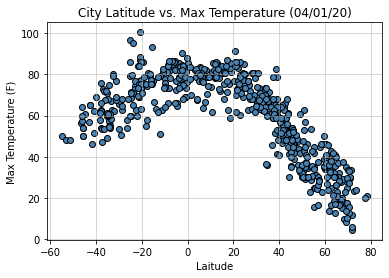

In [46]:
# Scatter plot - Lat vs Temp
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Max Temperature (F)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")



The temperatues increase as you get closer to the 0 latitude, the temps decrease the further away you are from the 0 latitude

## Latitude vs. Humidity Plot

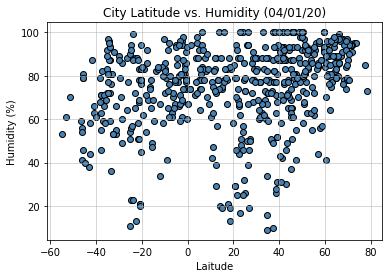

In [47]:
# Scatter plot - Lat vs Humidity
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Humidity (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Humidity (%)")

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")


Humidity seems to stay around the 80% mark for a majority of the latitudes, however, Polar regions do seem to have lower humidity %

## Latitude vs. Cloudiness Plot

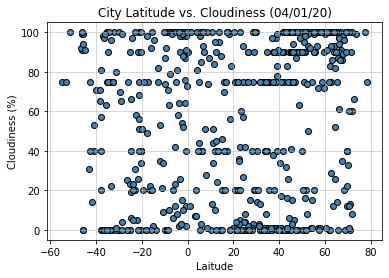

In [48]:
# Scatter plot - Lat vs Cloudiness
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")


Cloudiness seems to be widespread, no real pattern seen, just follows latitude in a liniar manner

## Latitude vs. Wind Speed Plot

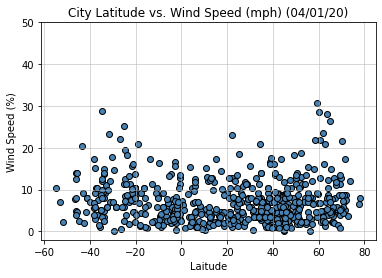

In [49]:
# Scatter plot - Lat vs Wind Speed
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Title
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# X-axis label
plt.xlabel("Laitude")

# Y-axis label
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)

# Grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed.png")


Majority of the windspeed data was below the 10mph mark, with only a smaller portion reaching 30mph.  The data is widely spread across the latitude

## Linear Regression

In [50]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [51]:
# Defining function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.9
y = -0.99x + 93.85


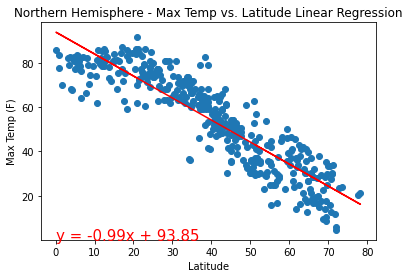

In [52]:
# Equation for liniar
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
print(equation)
# annotating 
annotate(equation, 0, 0)

# Title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


There is a negative correlation between the latitude and Max Temp for the Northern Hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.65
y = 0.52x + 81.75


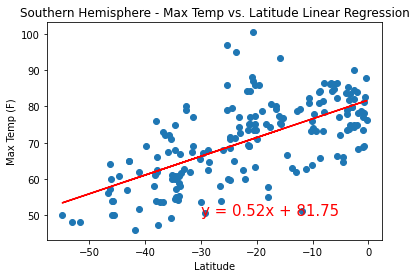

In [53]:
# Equation for liniar
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
print(equation)
# annotating 
annotate(equation, -30, 50)

# Title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


There is a positive correlation between the latitude and Max Temp for the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.29
y = 0.29x + 64.9


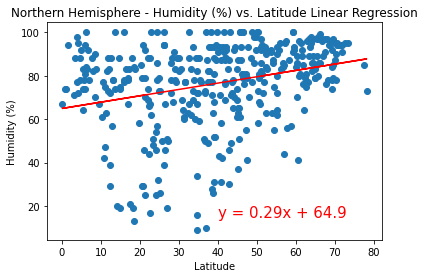

In [54]:
# Equation for liniar
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
print(equation)
# annotating 
annotate(equation, 40, 15)

# Title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There is a positive correlation between the latitude and Humidity for the Northern Hemisphere

The r-value is : 0.24
y = 0.3x + 77.63


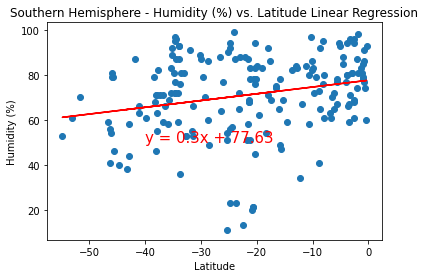

In [55]:
# Equation for liniar
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
print(equation)
# annotating 
annotate(equation, -40, 50)

# Title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive correlation between the latitude and Humidity for the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.21
y = 0.44x + 37.47


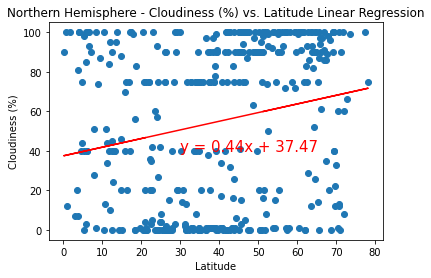

In [56]:
# Equation for liniar
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
print(equation)
# annotating 
annotate(equation, 30, 40)

# Title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a positive correlation between the latitude and Cloudiness for the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.04
y = 0.1x + 54.44


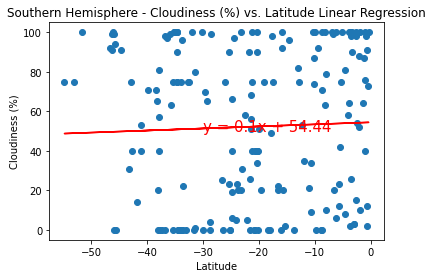

In [57]:
# Equation for liniar
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
print(equation)
# annotating 
annotate(equation, -30, 50)

# Title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a positive correlation between the latitude and Cloudiness for the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.15
y = 0.04x + 5.39


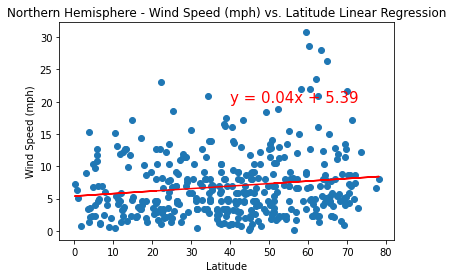

In [58]:
# Equation for liniar
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
print(equation)
# annotating 
annotate(equation, 40, 20)

# Title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a barely any positive correlation between the latitude and windspeed for the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.2
y = -0.08x + 6.09


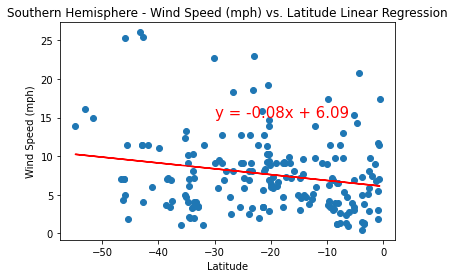

In [90]:
# Equation for liniar
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
print(equation)
# annotating 
annotate(equation, -30, 15)

# Title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# X-label
plt.xlabel("Latitude")

# Y-label
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a veri minimal negative correlation between the latitude and windspeed for the Southern Hemisphere